# Draws Recognition

### Installs

In [4]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/7b/2e/a676a77c65a854469f08e8ceccb0e47ad87c0a776b0a9b8f834ded85ed6e/ultralytics-8.2.28-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 590.2 kB/s eta 0:00:0031m2.3 MB/s eta 0:00:01
  Obtaining dependency information for opencv-python>=4.6.0 from https://files.pythonhosted.org/packages/89/ab/bcecb53836760d5ac9e09937ee0bb445d8701e38ad3ffdace37930069e7f/opencv_python-4.10.0.82-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ultralytics-thop>=0.2.5 from https://files.pythonhosted.org/packages/94/b2/8279f18815e66a7af55531a3c1a4470478c122073b208a82fc9d41db2294/ultralytics_thop-0.2.7-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 4.6 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 20.0 MB/s eta 0:00:00m eta 0:00:010:01:01


In [5]:
!pip install roboflow

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/58/8b/92421decb23b590d9d0fd68de5531fee619fd509ecdf31c9649f037c6b5e/roboflow-1.1.30-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
  Obtaining dependency information for cycler==0.10.0 from https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for idna==2.10 from https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/76/02/f128517f3ade4bb5f71e2afd8461dba70e3f466ce745fa1fd

## Torch and GPU check

In [11]:
import torch
import ultralytics
from roboflow import Roboflow
from IPython.display import Image, display
from IPython import display
import os

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2060'

In [32]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [7]:
ultralytics.checks()

Ultralytics YOLOv8.2.28 🚀 Python-3.11.5 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5904MiB)
Setup complete ✅ (12 CPUs, 15.5 GB RAM, 58.1/227.1 GB disk)


In [9]:
display.clear_output()

In [26]:
!nvidia-smi

Wed Jun  5 23:36:14 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2060        Off | 00000000:26:00.0  On |                  N/A |
| 21%   48C    P8              18W / 170W |    773MiB /  6144MiB |      6%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Home catalog

In [12]:
HOME = os.getcwd()
print(HOME)

/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition


In [13]:
!mkdir datasets

In [16]:
%cd datasets

/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets


In [17]:
!pwd

/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets


## Danwload Images from YOLOv8 API

In [18]:
rf = Roboflow(api_key="9zbTgwMWBvZgonLi9Jla")
project = rf.workspace("krasnalewroclawskie-envp3").project("krasnele_wro-g63lz")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Krasnele_Wro-3 in yolov8:: 100%|████████████████████████████████████████████████████████████████████████████████████| 7050/7050 [00:00<00:00, 10556.33it/s]


In [19]:
%cd ../

/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition


## Custom model training

### Train

In [34]:
!yolo task=detect mode=train model=yolov8m.pt data=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/data.yaml epochs=60 imgsz=516 name=trein60epochs

Ultralytics YOLOv8.2.28 🚀 Python-3.11.5 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5904MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=516, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=trein60epochs, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, 

### Valid

In [35]:
!yolo task=detect mode=val model=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/runs/detect/trein60epochs/weights/best.pt data=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/data.yaml

Ultralytics YOLOv8.2.28 🚀 Python-3.11.5 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5904MiB)
Model summary (fused): 218 layers, 25860604 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 300, len(boxes) = 334. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        294        334      0.968      0.949      0.974      0.936
             Automatek          8          8      0.984          1      0.995      0.983
      Babelek_Chlaptus          8          8      0.987          1      0.995      0.995
               Bawarka          7          7      0.985          1      0.995      0.995
             Czimnejek          7  

### Test

In [36]:
!yolo task=detect mode=predict model=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/runs/detect/trein60epochs/weights/best.pt conf=0.7 source=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/test/images

Ultralytics YOLOv8.2.28 🚀 Python-3.11.5 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5904MiB)
Model summary (fused): 218 layers, 25860604 parameters, 0 gradients, 78.8 GFLOPs

image 1/154 /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/test/images/0_Dziupelka_jpg.rf.a26d784dc7cc00c35eb793a3526784b7.jpg: 544x544 2 Dziupelkas, 18.4ms
image 2/154 /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/test/images/0_Golebnik_png.rf.b5775cd1e761cce425de65f448de0582.jpg: 544x544 1 Golebnik, 18.4ms
image 3/154 /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/test/images/0_Parasolniki_jpg.rf.b1eb873743c068bdaf037d2e5faff39d.jpg: 544x544 (no detections), 18.4ms
image 4/154 /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/datasets/Krasnele_Wro-3/test/images/10_Demokracja_jpeg.rf.bb3289de7c75451b83235f0e25564f1f.jpg: 544x544 1 Demokracja, 18.3ms
image 5/154 /ho

## Send model to Roboflow deploy

In [55]:
project.version(2).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/trein60epochs/")

Dependency ultralytics==8.0.196 is required but found version=8.2.28, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/krasnalewroclawskie-envp3/krasnele_wro-g63lz/2
Share your model with the world at: https://universe.roboflow.com/krasnalewroclawskie-envp3/krasnele_wro-g63lz/model/2


## Statistics

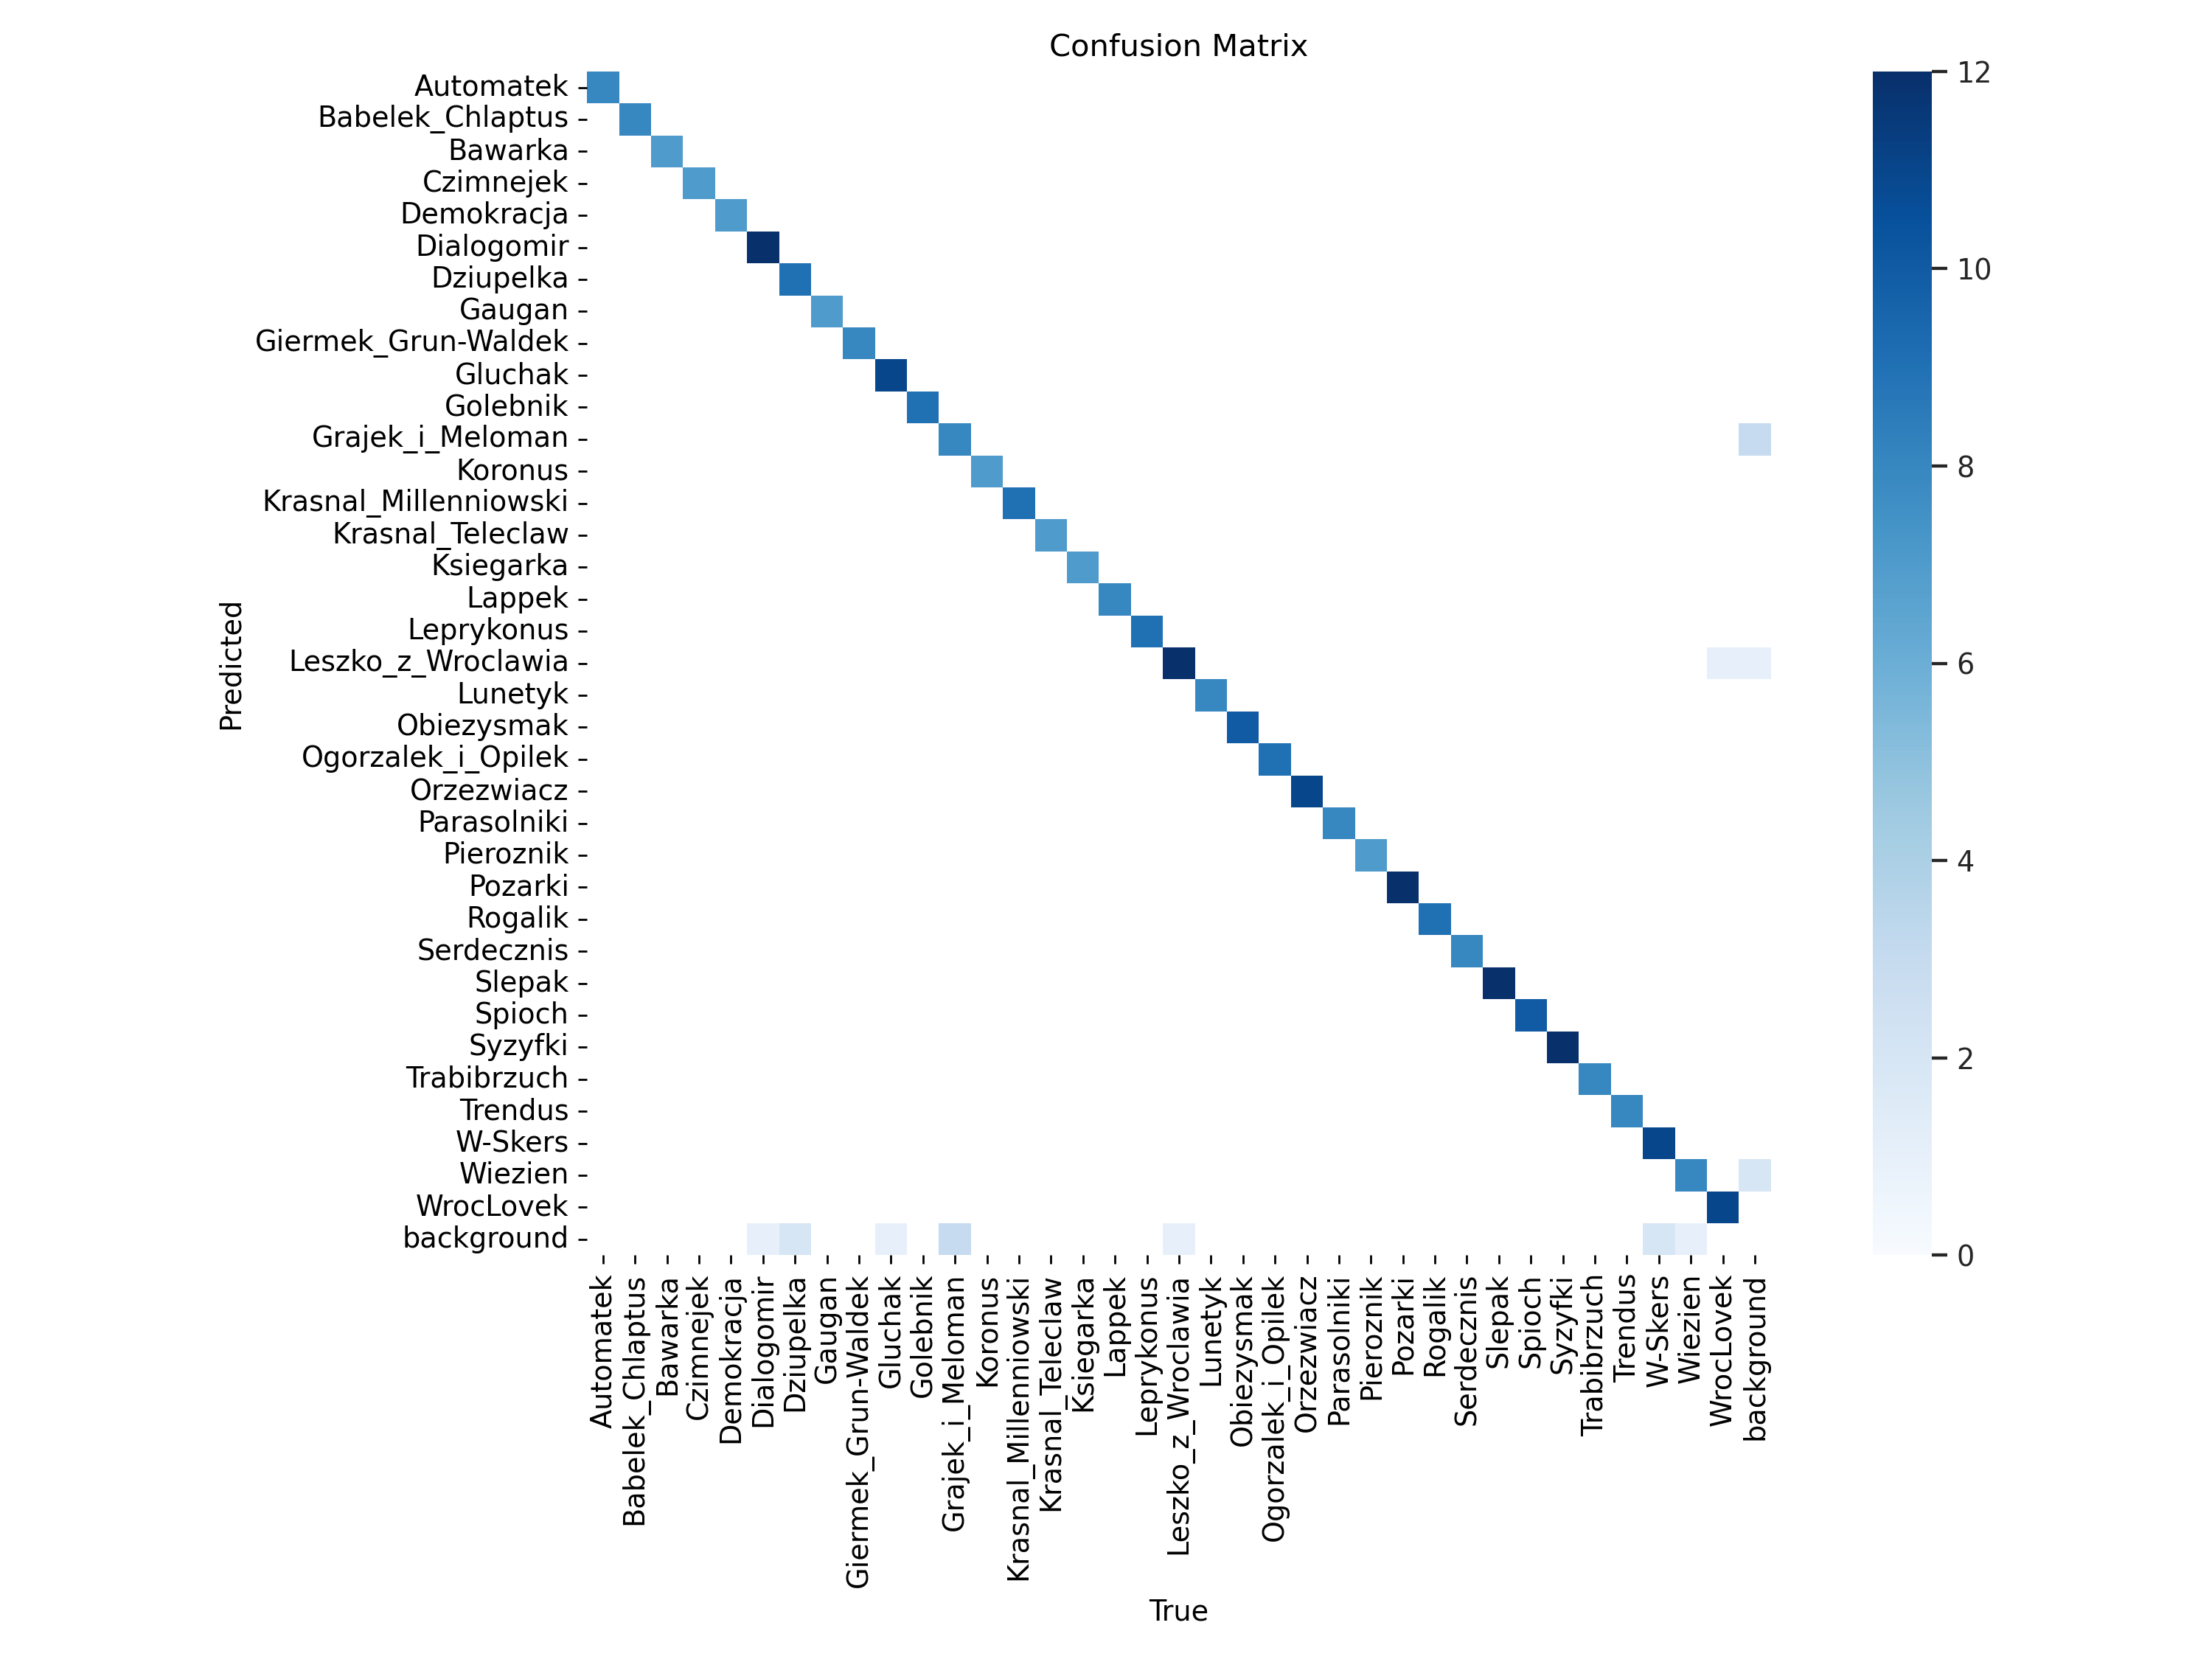

In [38]:
Image(filename=f'/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/runs/detect/trein60epochs/confusion_matrix.png', width=1000)

In [46]:
!pwd

/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition


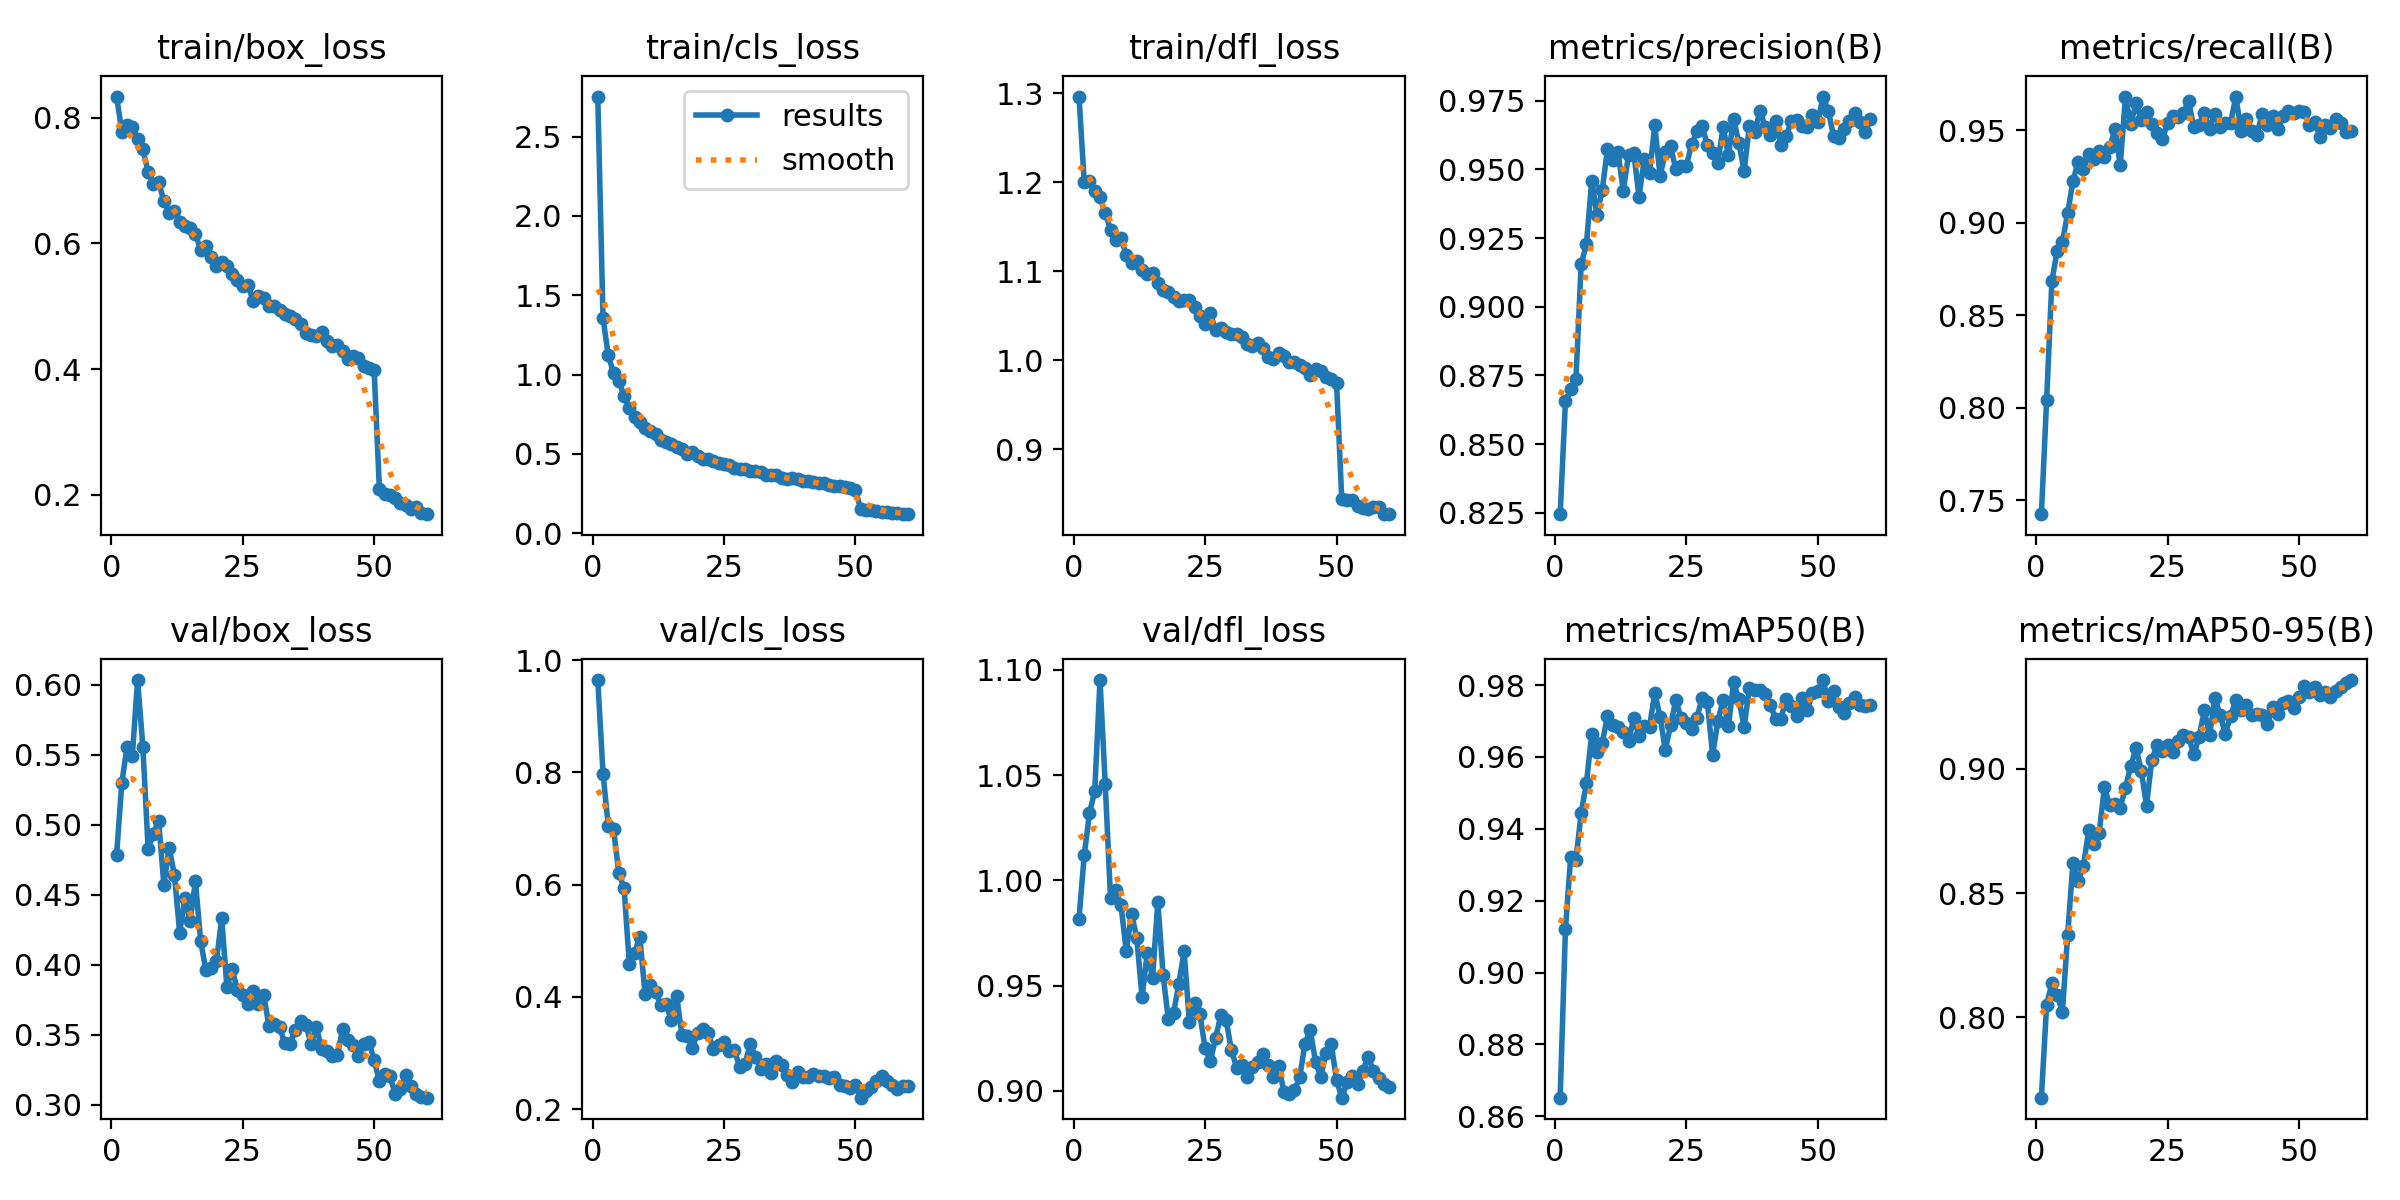

In [47]:
Image(filename=f'{HOME}/runs/detect/trein60epochs/results.png', width=1000)

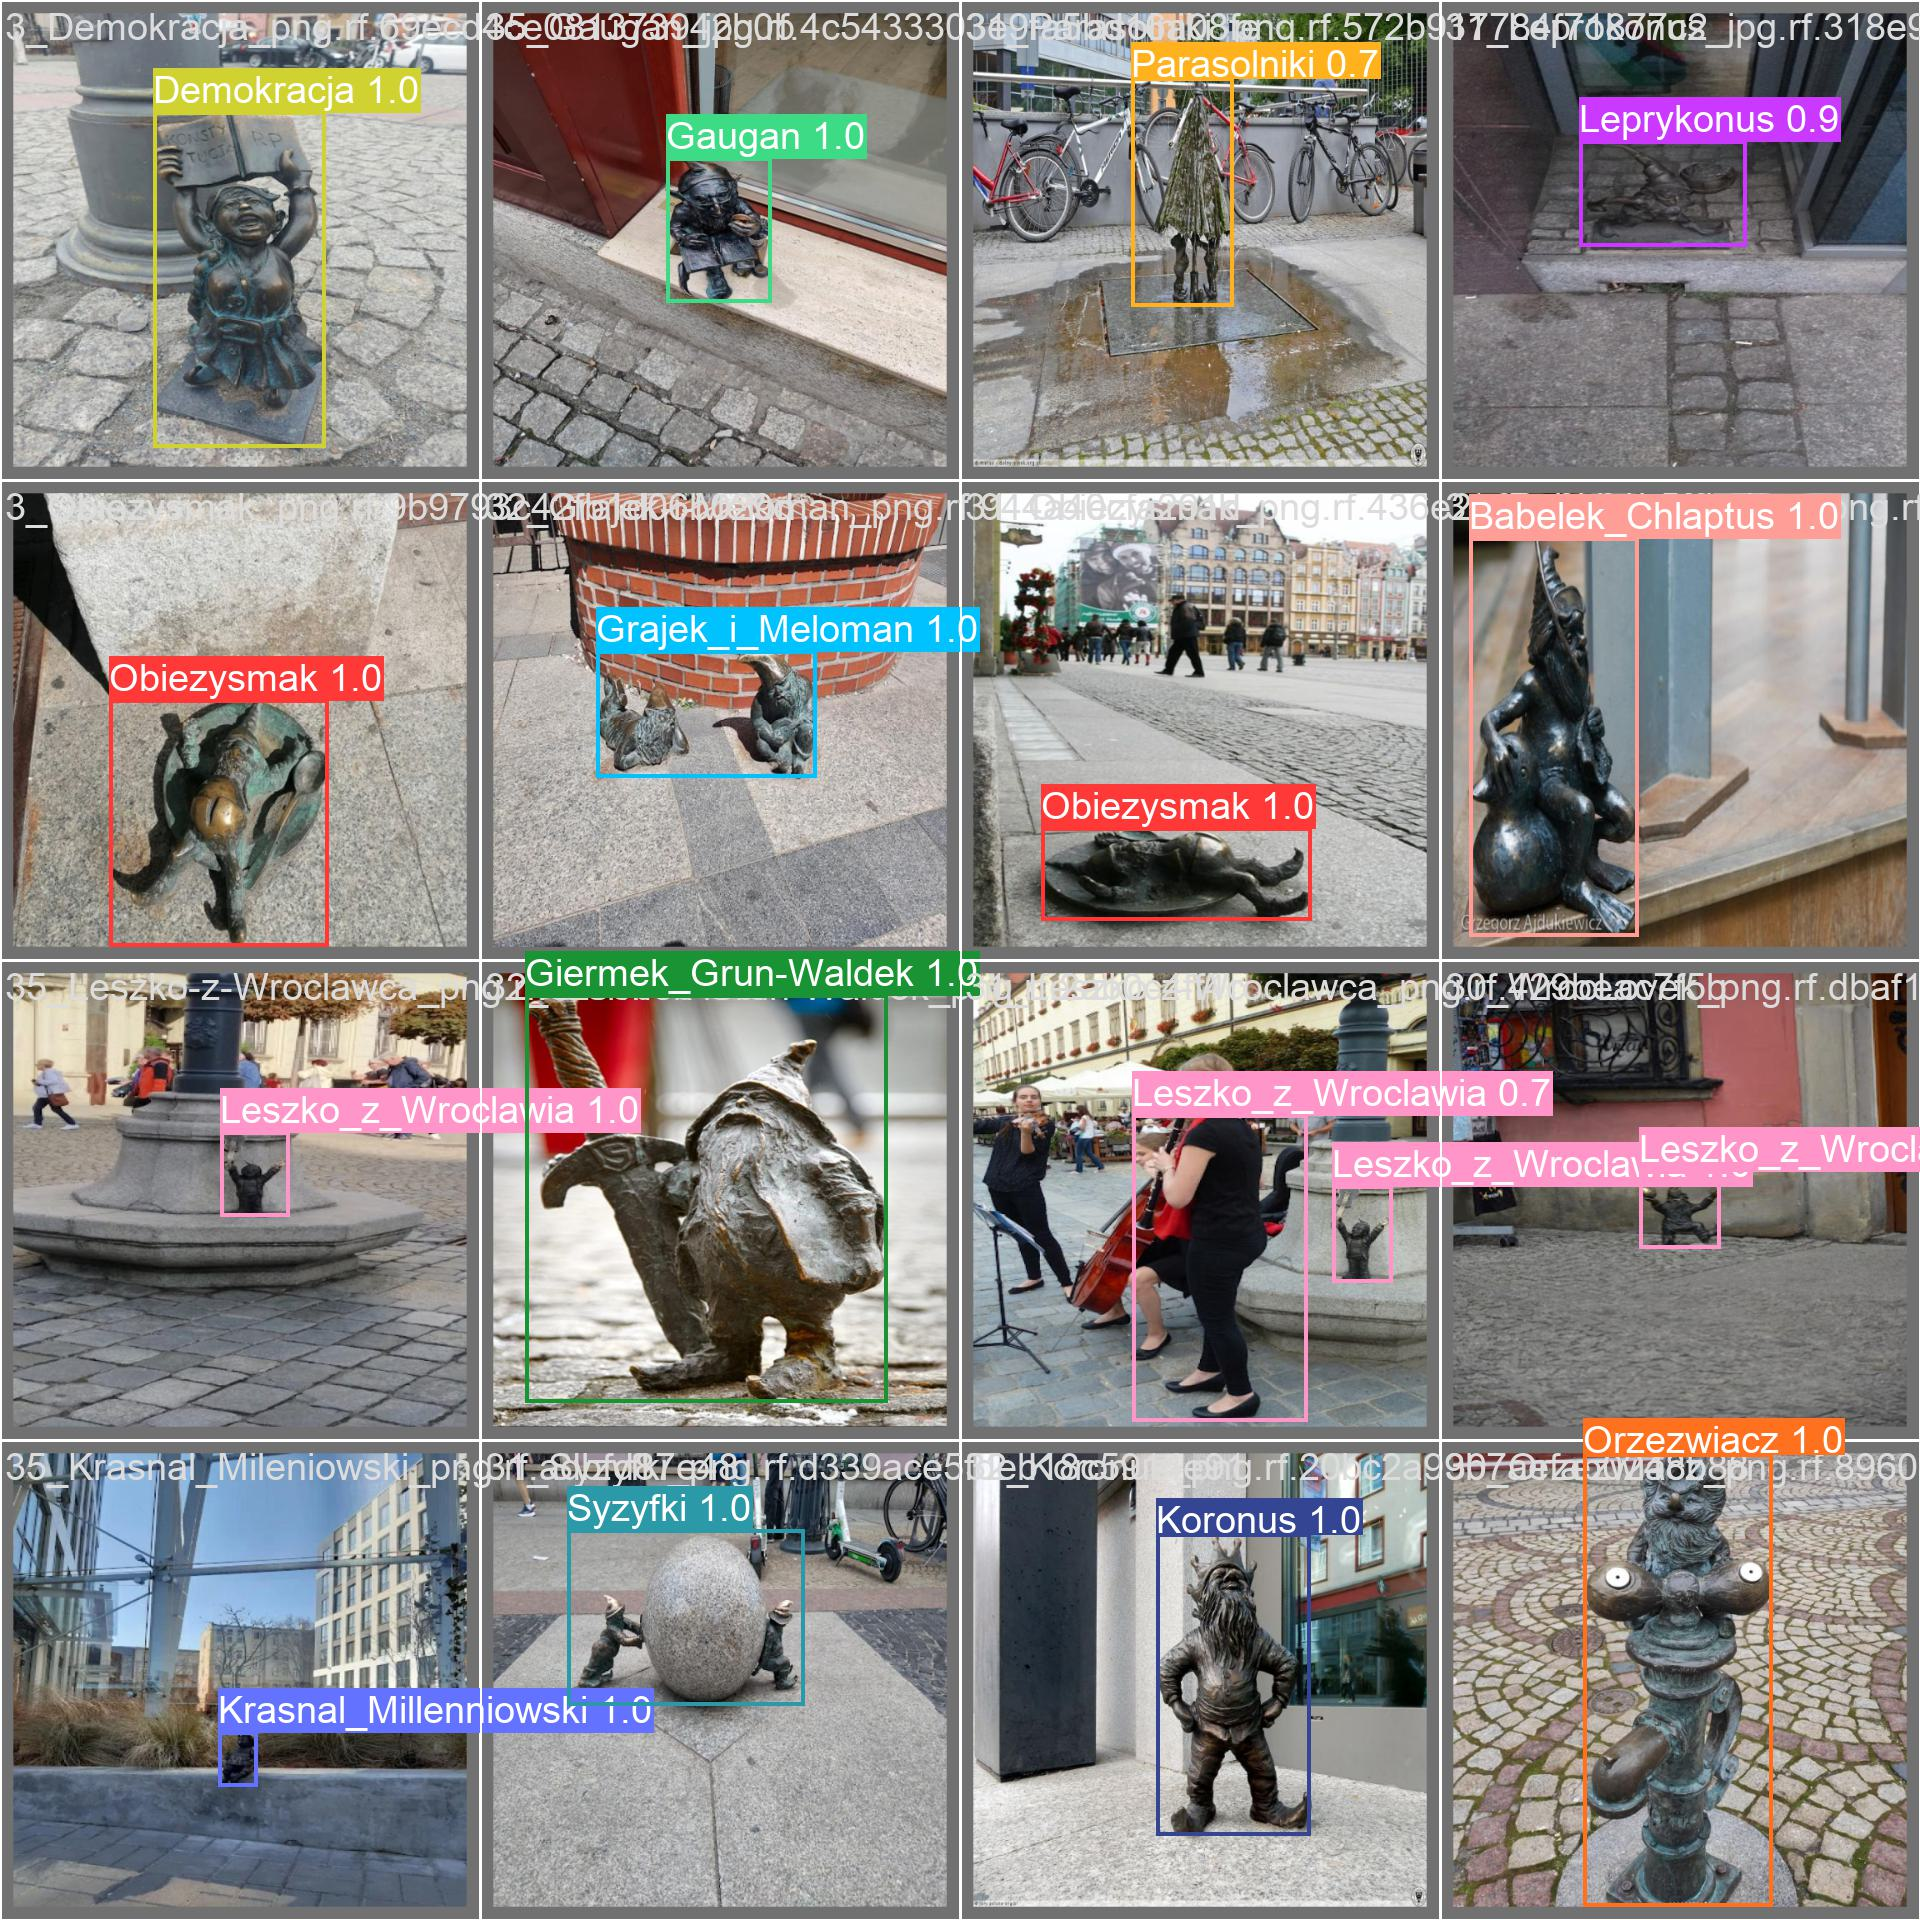

In [48]:
Image(filename=f'{HOME}/runs/detect/trein60epochs/val_batch1_pred.jpg', width=1000)

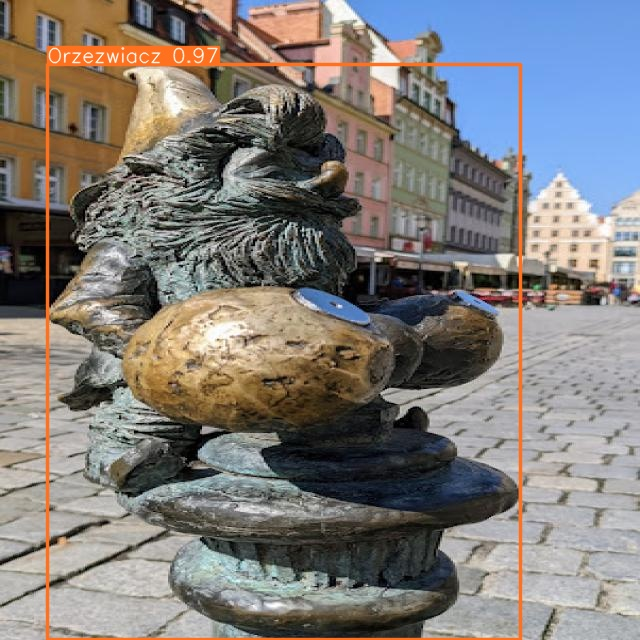

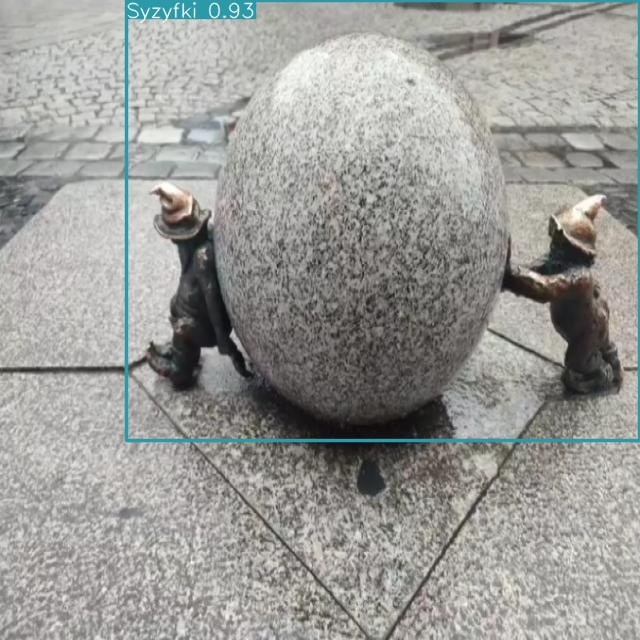

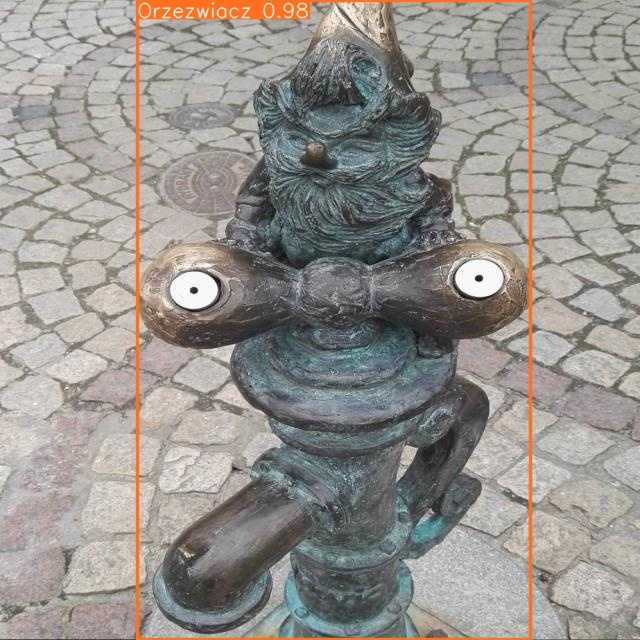

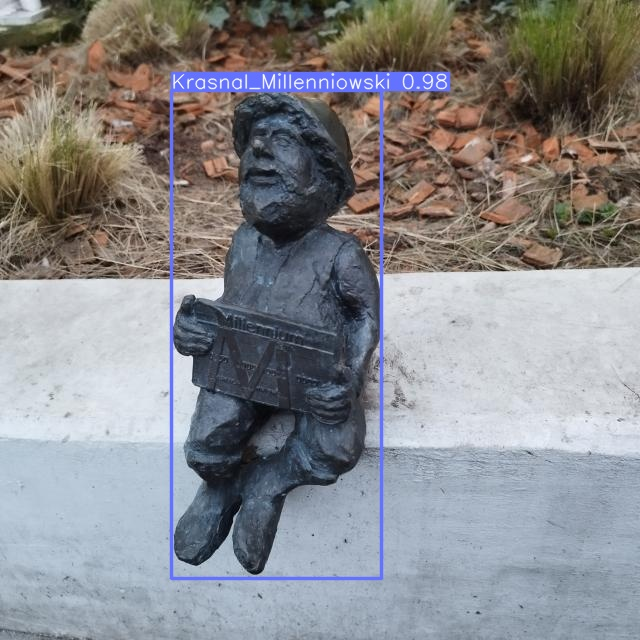

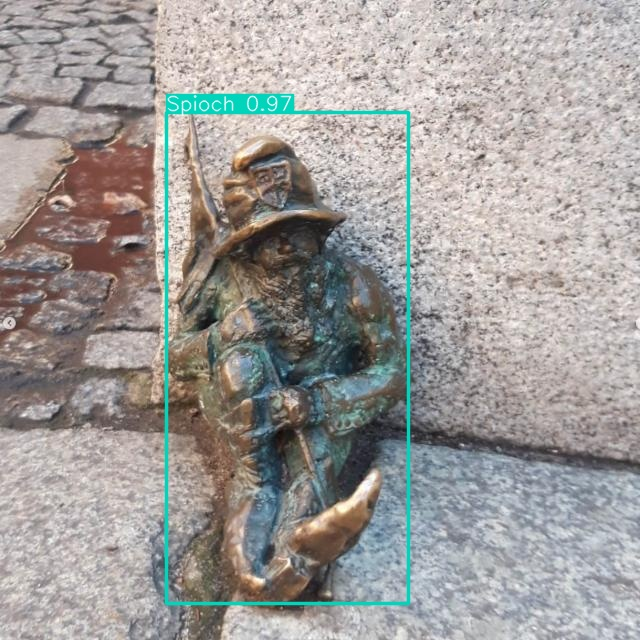

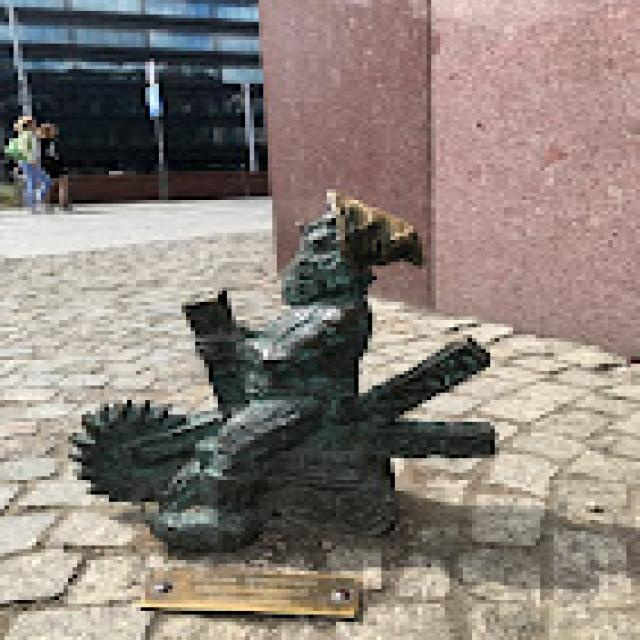

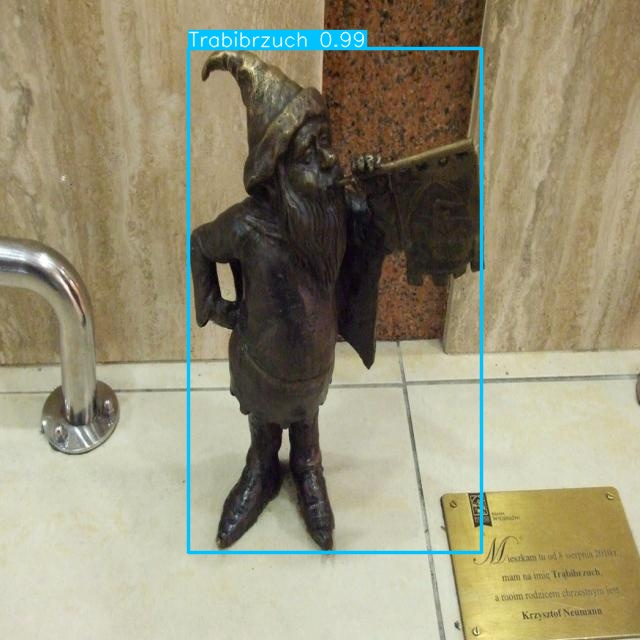

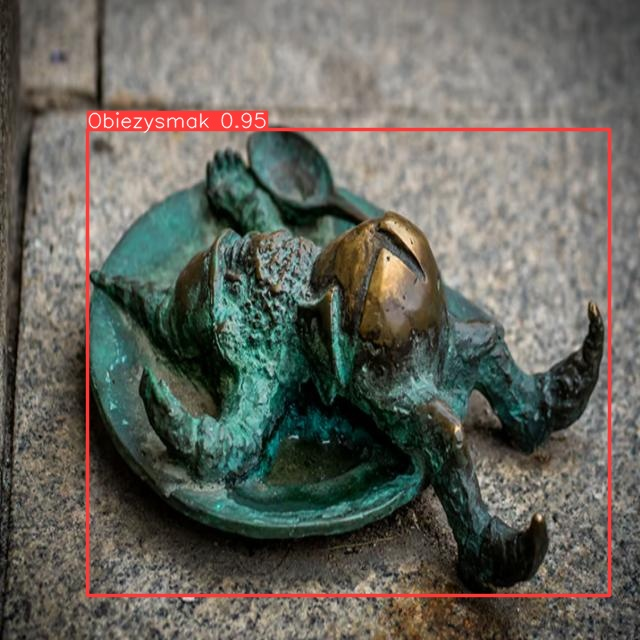

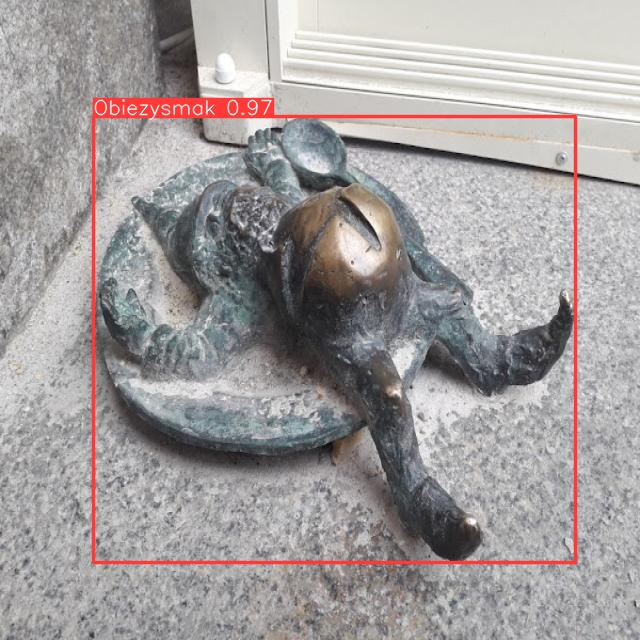

In [57]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[21:30]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [58]:
!yolo task=detect mode=predict model=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/runs/detect/trein60epochs/weights/best.pt conf=0.7 source=/home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/krasnal1.jpg

Ultralytics YOLOv8.2.28 🚀 Python-3.11.5 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 2060, 5904MiB)
Model summary (fused): 218 layers, 25860604 parameters, 0 gradients, 78.8 GFLOPs

image 1/1 /home/zuza/zuza/studia/projekt_krasnale/Wroclaws_Draws_Recognition/krasnal1.jpg: 544x416 1 Koronus, 46.8ms
Speed: 2.2ms preprocess, 46.8ms inference, 352.1ms postprocess per image at shape (1, 3, 544, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
